In [1]:
## SuperVised Machine Learning 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

### Understanding about the data

In [5]:
## Shape of the Data
df.shape

(25, 2)

In [6]:
## dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
## Correlation between data (or Strength Linear Assosication)
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Scores')

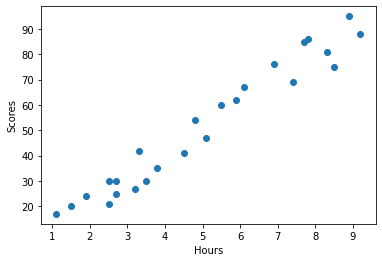

In [9]:
## Graphical view of data
import matplotlib.pyplot as plt
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
print(f'R2 Score Using linear Regression : {r2_score(y_test,y_pred)}')

R2 Score Using linear Regression : 0.9645832106996841


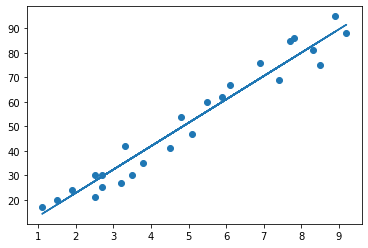

In [15]:
## Curve representation of our model
line = lr.coef_*x + lr.intercept_
plt.scatter(x,y)
plt.plot(x,line)

### Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree  = 2)
poly_x = poly.fit_transform(x)

In [17]:
x_train ,x_test , y_train ,y_test = train_test_split(poly_x , y , test_size = 0.2)

In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(f'R2 Score Using Polynomial linear Regression : {r2_score(y_test,y_pred)}')

R2 Score Using Polynomial linear Regression : 0.9522405532263463


In [22]:
## test for 9.25hr/dy
import numpy as np
print(f'Scores for 9.25hr/day : {lr.predict([[1 ,9.25 ,9.25*9.25]])}')

Scores for 9.25hr/day : [91.21377067]
